In [4]:
from utils import *

In [47]:
import matplotlib.pyplot as plt

In [23]:
import pdb

In [6]:
def get_image(path, crop = []):
    img = Image.open(path)
    img = img.rotate(90, expand = 1)
    return img.crop(crop)

In [11]:
img = get_image('/Users/gagan/Desktop/permafrost_data/test_image/20170730_180014.JPG', crop=(50, 300, 2700, 4200))

In [13]:
img.show()

# create crops

In [14]:
img_list = crop_grid(img, box_size = [350,500], top_offset = 100)

In [41]:
len(img_list)

49

In [18]:
img_list[20].size

(350, 500)

# texture features

In [12]:
from skimage.feature import greycomatrix, greycoprops

In [43]:
def generate_random_img_locations(img, patch_size = 5, num_locs = 5):
    # over sample row and column start indices
    H,W = img.size
    idx_rows = np.random.choice(np.arange(patch_size, H-patch_size), size = num_locs, replace=False)
    idx_cols = np.random.choice(np.arange(patch_size, W-patch_size), size = num_locs, replace=False)
    locations = [(r,c) for (r,c) in zip(idx_rows, idx_cols)]
    patches = []
    for loc in locations:
        patches.append(np.array(img.crop([loc[0], loc[1], loc[0]+patch_size, loc[1]+patch_size] ) ))
    return patches

In [44]:
img_patches = [generate_random_img_locations(I, patch_size=30, num_locs=30) for I in img_list]

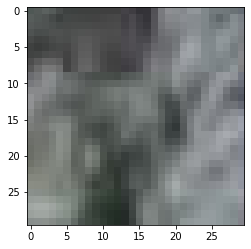

In [49]:
plt.imshow(img_patches[10][20])

In [ ]:
type()

In [50]:
def get_GCLM_features(patches):
    # compute some GLCM properties each patch
    xs = []
    ys = []
    for patch in (patches):
        glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
        xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
        ys.append(greycoprops(glcm, 'correlation')[0, 0])
    return xs, ys

In [51]:
gclm_feats = [get_GCLM_features(p) for p in img_patches]

ValueError: The parameter `image` must be a 2-dimensional array